<a href="https://colab.research.google.com/github/juanprado17/DH100/blob/main/DATA100_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import nltk
import time
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import HTML
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
from nltk.tokenize import sent_tokenize
import matplotlib.animation as animation

#This is just so I am able to see all the rows in the dataset instead of only
#seeing part of the data.
pd.set_option("max_rows", 999)

#Research Question #1

In [ ]:
#The MLS salaries dataset contains all of the earnings in dollars of over five thousand MLS soccer players.
#The data that is going to be analyzed ranges from the year 2007 through 2017. The data in fact has two columns 
#in which it gives the base salary in one of the columns and guarenteed compensation in the other column. For the 
#matter of simplicity we are going to compare the players salaries by only looking at the guarenteed compensation.
salaries_07 = pd.read_csv("mls-salaries-2007.csv")
salaries_08 = pd.read_csv("mls-salaries-2008.csv")
salaries_09 = pd.read_csv("mls-salaries-2009.csv")
salaries_10 = pd.read_csv("mls-salaries-2010.csv")
salaries_11 = pd.read_csv("mls-salaries-2011.csv")
salaries_12 = pd.read_csv("mls-salaries-2012.csv")
salaries_13 = pd.read_csv("mls-salaries-2013.csv")
salaries_14 = pd.read_csv("mls-salaries-2014.csv")
salaries_15 = pd.read_csv("mls-salaries-2015.csv")
salaries_16 = pd.read_csv("mls-salaries-2016.csv")
salaries_17 = pd.read_csv("mls-salaries-2017.csv")

###Data Cleaning

In [ ]:
#Data Cleaning:
#Using the .dropna() function in order to avoid using data that has missing values. 
#Basically, what the .dropna() function is saying is, "drop the row with at least one element missing"
#Source: https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php
#2007 data:
new_salaries_07 = salaries_07.dropna()
new_salaries_07.drop('base_salary', axis = 1, inplace = True)
new_salaries_07.sort_values(by = ['position'])

#2008 data:
new_salaries_08 = salaries_08.dropna()
new_salaries_08.drop('base_salary', axis = 1, inplace = True)
new_salaries_08.sort_values(by = ['position'])

#2009 data:
new_salaries_09 = salaries_09.dropna()
new_salaries_09.drop('base_salary', axis = 1, inplace = True)
new_salaries_09.sort_values(by = ['position'])

#2010 data:
new_salaries_10 = salaries_10.dropna()
new_salaries_10.drop('base_salary', axis = 1, inplace = True)
new_salaries_10.sort_values(by = ['position'])

#2011 data:
new_salaries_11 = salaries_11.dropna()
new_salaries_11.drop('base_salary', axis = 1, inplace = True)
new_salaries_11.sort_values(by = ['position'])

#2012 data:
new_salaries_12 = salaries_12.dropna()
new_salaries_12.drop('base_salary', axis = 1, inplace = True)
new_salaries_12.sort_values(by = ['position'])

#2013 data:
new_salaries_13 = salaries_13.dropna()
new_salaries_13.drop('base_salary', axis = 1, inplace = True)
new_salaries_13.sort_values(by = ['position'])

#2014 data:
new_salaries_14 = salaries_14.dropna()
new_salaries_14.drop('base_salary', axis = 1, inplace = True)
new_salaries_14.sort_values(by = ['position'])

#2015 data:
new_salaries_15 = salaries_15.dropna()
new_salaries_15.drop('base_salary', axis = 1, inplace = True)
new_salaries_15.sort_values(by = ['position'])

#2016 data:
new_salaries_16 = salaries_16.dropna()
new_salaries_16.drop('base_salary', axis = 1, inplace = True)
new_salaries_16.sort_values(by = ['position'])

#2017 data:
new_salaries_17 = salaries_17.dropna()
new_salaries_17.drop('base_salary', axis = 1, inplace = True)
new_salaries_17.sort_values(by = ['position'])

In [ ]:
#This is just to test if we are able to see our original data set after we made edits in [2]
salaries_07
salaries_08
salaries_09
salaries_10
salaries_11
salaries_12
salaries_13
salaries_14
salaries_15
salaries_16
salaries_17

In [ ]:
#Now that we have all of our data in alphabetical order based on position we can now grab the rows that contain each distinct 
#position and sum up the 'guarenteed_compensation' column to help answer our research question. The dataset was inconsistent 
#with the abbreviations of the specific positions of the players so I decided to just categorize the posotions into more 
#general descriptions. For example, GK = Goalkeeper, D = Defense, M = Midfield, F = Forward. The reason is because in the
#dataset Defense is represented as D, F-D, D-F, Midfield is represented as M, D-M, M-D, M-F, M/F, MF, Forward is represented as
#F, F-M, F/M, and Goalkeeper is just GK. A bit confusing but, being able to narrow it down and making these bins make it a little
#more understandable. 

#I will extract these four different positions from 'new_salaries_07' to compare and help answer the first research question.
#In order to do this I will use some methods of row extraction. For the extraction of multiple subgroups I will use the .isin() function.
#Source: https://colab.research.google.com/github/jigsawlabs-student/pandas-free-curriculum/blob/master/4-selecting-rows-lab.ipynb
#Source: https://stackoverflow.com/questions/36410075/select-rows-from-a-dataframe-based-on-multiple-values-in-a-column-in-pandas

#2007 Dataset:
GK_07 = new_salaries_07[new_salaries_07['position'] == 'GK']  
D_07 = new_salaries_07[new_salaries_07['position'].isin(['D', 'F-D', 'D-F'])]  
M_07 = new_salaries_07[new_salaries_07['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_07 = new_salaries_07[new_salaries_07['position'].isin(['F', 'F-M', 'F/M'])]

#We will then sum up the 'guaranteed_compensation' column in order to find out which position genereated the highest total salary
#over the years. To do this we will use the sum() function
sum_GK_07 = GK_07['guaranteed_compensation'].sum()
sum_GK_07

sum_D_07 = D_07['guaranteed_compensation'].sum()
sum_D_07

#For some reason the cents are added up weird. Assuming it's .41 cents
sum_M_07 = M_07['guaranteed_compensation'].sum()
sum_M_07

sum_F_07 = F_07['guaranteed_compensation'].sum()
sum_F_07

#2008 Dataset
GK_08 = new_salaries_08[new_salaries_08['position'] == 'GK']  
D_08 = new_salaries_08[new_salaries_08['position'].isin(['D', 'F-D', 'D-F'])]  
M_08 = new_salaries_08[new_salaries_08['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_08 = new_salaries_08[new_salaries_08['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_08 = GK_08['guaranteed_compensation'].sum()
sum_GK_08

sum_D_08 = D_08['guaranteed_compensation'].sum()
sum_D_08

sum_M_08 = M_08['guaranteed_compensation'].sum()
sum_M_08

sum_F_08 = F_08['guaranteed_compensation'].sum()
sum_F_08

#2009 Dataset:
GK_09 = new_salaries_09[new_salaries_09['position'] == 'GK']  
D_09 = new_salaries_09[new_salaries_09['position'].isin(['D', 'F-D', 'D-F'])]  
M_09 = new_salaries_09[new_salaries_09['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_09 = new_salaries_09[new_salaries_09['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_09 = GK_09['guaranteed_compensation'].sum()
sum_GK_09

sum_D_09 = D_09['guaranteed_compensation'].sum()
sum_D_09

sum_M_09 = M_09['guaranteed_compensation'].sum()
sum_M_09

sum_F_09 = F_09['guaranteed_compensation'].sum()
sum_F_09

#2010 Dataset:
GK_10 = new_salaries_10[new_salaries_10['position'] == 'GK']  
D_10 = new_salaries_10[new_salaries_10['position'].isin(['D', 'F-D', 'D-F'])]  
M_10 = new_salaries_10[new_salaries_10['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_10 = new_salaries_10[new_salaries_10['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_10 = GK_10['guaranteed_compensation'].sum()
sum_GK_10

sum_D_10 = D_10['guaranteed_compensation'].sum()
sum_D_10

sum_M_10 = M_10['guaranteed_compensation'].sum()
sum_M_10

sum_F_10 = F_10['guaranteed_compensation'].sum()
sum_F_10

#2011 Dataset:
GK_11 = new_salaries_11[new_salaries_11['position'] == 'GK']  
D_11 = new_salaries_11[new_salaries_11['position'].isin(['D', 'F-D', 'D-F'])]  
M_11 = new_salaries_11[new_salaries_11['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_11 = new_salaries_11[new_salaries_11['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_11 = GK_11['guaranteed_compensation'].sum()
sum_GK_11

sum_D_11 = D_11['guaranteed_compensation'].sum()
sum_D_11

sum_M_11 = M_11['guaranteed_compensation'].sum()
sum_M_11

sum_F_11 = F_11['guaranteed_compensation'].sum()
sum_F_11

#2012 Dataset:
GK_12 = new_salaries_12[new_salaries_12['position'] == 'GK']  
D_12 = new_salaries_12[new_salaries_12['position'].isin(['D', 'F-D', 'D-F'])]  
M_12 = new_salaries_12[new_salaries_12['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_12 = new_salaries_12[new_salaries_12['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_12 = GK_12['guaranteed_compensation'].sum()
sum_GK_12

sum_D_12 = D_12['guaranteed_compensation'].sum()
sum_D_12

sum_M_12 = M_12['guaranteed_compensation'].sum()
sum_M_12

sum_F_12 = F_12['guaranteed_compensation'].sum()
sum_F_12

#2013 Dataset:
GK_13 = new_salaries_13[new_salaries_13['position'] == 'GK']  
D_13 = new_salaries_13[new_salaries_13['position'].isin(['D', 'F-D', 'D-F'])]  
M_13 = new_salaries_13[new_salaries_13['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_13 = new_salaries_13[new_salaries_13['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_13 = GK_13['guaranteed_compensation'].sum()
sum_GK_13

sum_D_13 = D_13['guaranteed_compensation'].sum()
sum_D_13

sum_M_13 = M_13['guaranteed_compensation'].sum()
sum_M_13

sum_F_13 = F_13['guaranteed_compensation'].sum()
sum_F_13

#2014 Dataset:
GK_14 = new_salaries_14[new_salaries_14['position'] == 'GK']  
D_14 = new_salaries_14[new_salaries_14['position'].isin(['D', 'F-D', 'D-F'])]  
M_14 = new_salaries_14[new_salaries_14['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_14 = new_salaries_14[new_salaries_14['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_14 = GK_14['guaranteed_compensation'].sum()
sum_GK_14

sum_D_14 = D_14['guaranteed_compensation'].sum()
sum_D_14

sum_M_14 = M_14['guaranteed_compensation'].sum()
sum_M_14

sum_F_14 = F_14['guaranteed_compensation'].sum()
sum_F_14

#2015 Dataset:
GK_15 = new_salaries_15[new_salaries_15['position'] == 'GK']  
D_15 = new_salaries_15[new_salaries_15['position'].isin(['D', 'F-D', 'D-F'])]  
M_15 = new_salaries_15[new_salaries_15['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_15 = new_salaries_15[new_salaries_15['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_15 = GK_15['guaranteed_compensation'].sum()
sum_GK_15

sum_D_15 = D_15['guaranteed_compensation'].sum()
sum_D_15

sum_M_15 = M_15['guaranteed_compensation'].sum()
sum_M_15

sum_F_15 = F_15['guaranteed_compensation'].sum()
sum_F_15

#2016 Dataset:
GK_16 = new_salaries_16[new_salaries_16['position'] == 'GK']  
D_16 = new_salaries_16[new_salaries_16['position'].isin(['D', 'F-D', 'D-F'])]  
M_16 = new_salaries_16[new_salaries_16['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_16 = new_salaries_16[new_salaries_16['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_16 = GK_16['guaranteed_compensation'].sum()
sum_GK_16

sum_D_16 = D_16['guaranteed_compensation'].sum()
sum_D_16

sum_M_16 = M_16['guaranteed_compensation'].sum()
sum_M_16

sum_F_16 = F_16['guaranteed_compensation'].sum()
sum_F_16

#2017 Dataset:
GK_17 = new_salaries_17[new_salaries_17['position'] == 'GK']  
D_17 = new_salaries_17[new_salaries_17['position'].isin(['D', 'F-D', 'D-F'])]  
M_17 = new_salaries_17[new_salaries_17['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_17 = new_salaries_17[new_salaries_17['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_17 = GK_17['guaranteed_compensation'].sum()
sum_GK_17

sum_D_17 = D_17['guaranteed_compensation'].sum()
sum_D_17

sum_M_17 = M_17['guaranteed_compensation'].sum()
sum_M_17

sum_F_17 = F_17['guaranteed_compensation'].sum()
sum_F_17

63045355.34

In [ ]:
GK_17

##Research Question #1 Graphs 

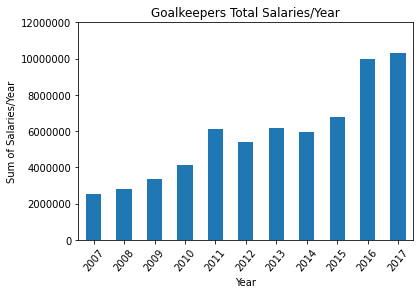

In [ ]:
#This graph is going to represent the GK salaries from 2007-2017.
#Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html#pandas.DataFrame.plot.bar
GK_graph = pd.DataFrame({'Year':['2007', '2008', '2009', '2010', '2011', '2012', 
                                 '2013', '2014', '2015', '2016', '2017'], 'Salary'
                                 :[2520132.1, 2791094.95, 3347687.36, 4136779.99, 6103987.79, 
                                   5410775.54, 6168036.83, 5929929.66, 6796012.28, 9963257.36, 10313235.12]})
ax = GK_graph.plot.bar(x = 'Year', y = 'Salary', rot = 50)

#Source:https://stackoverflow.com/questions/46735745/how-to-control-scientific-notation-in-matplotlib
plt.ticklabel_format(style='plain', axis='y')
plt.title('Goalkeepers Total Salaries/Year');
plt.xlabel('Year')
plt.ylabel('Sum of Salaries/Year')
plt.ylim(0, 12000000)
ax.get_legend().remove()

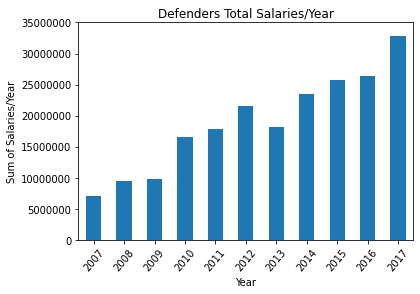

In [ ]:
#This graph is going to represent the D salaries from 2007-2017.
D_graph = pd.DataFrame({'Year':['2007', '2008', '2009', '2010', '2011', '2012', 
                                 '2013', '2014', '2015', '2016', '2017'], 'Salary'
                                 :[7070760.85, 9423866.62, 9775513.43, 16601872.97, 17823967.0, 
                                   21534705.95, 18175655.92, 23533773.13, 25674896.03, 26387530.81, 32760305.86]})
ax = D_graph.plot.bar(x = 'Year', y = 'Salary', rot = 50)

plt.ticklabel_format(style='plain', axis='y')
plt.title('Defenders Total Salaries/Year');
plt.xlabel('Year')
plt.ylabel('Sum of Salaries/Year')
plt.ylim(0, 35000000)
ax.get_legend().remove()

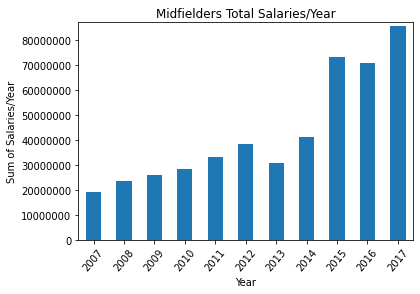

In [ ]:
#This graph is going to represent the M salaries from 2007-2017.
M_graph = pd.DataFrame({'Year':['2007', '2008', '2009', '2010', '2011', '2012', 
                                 '2013', '2014', '2015', '2016', '2017'], 'Salary'
                                 :[19357582.41, 23474752.75, 26028285.26, 28553760.2, 33053858.82, 
                                   38192936.12, 30707560.97, 41074803.45, 73164563.82, 70854407.82, 85662614.21]})
ax = M_graph.plot.bar(x = 'Year', y = 'Salary', rot = 50)

plt.ticklabel_format(style='plain', axis='y')
plt.title('Midfielders Total Salaries/Year');
plt.xlabel('Year')
plt.ylabel('Sum of Salaries/Year')
plt.ylim(0, 87000000)
ax.get_legend().remove()

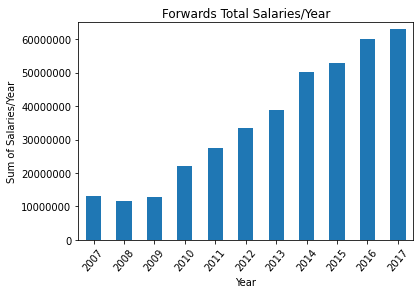

In [ ]:
#This graph is going to represent the F salaries from 2007-2017.
M_graph = pd.DataFrame({'Year':['2007', '2008', '2009', '2010', '2011', '2012', 
                                 '2013', '2014', '2015', '2016', '2017'], 'Salary'
                                 :[13275184.71, 11602794.89, 12726564.44, 22012559.54, 27562666.20, 
                                   33434759.67, 38911813.58, 50341870.21, 52794841.19, 59956217.33, 63045355.34]})
ax = M_graph.plot.bar(x = 'Year', y = 'Salary', rot = 50)

plt.ticklabel_format(style='plain', axis='y')
plt.title('Forwards Total Salaries/Year');
plt.xlabel('Year')
plt.ylabel('Sum of Salaries/Year')
plt.ylim(0, 65000000)
ax.get_legend().remove()

#Research Question #2

##Data Cleaning

In [ ]:
#Alternative:
#find the player that earned the highest each yean and graph accordingly using 
#a scatter plot.

#2007 data
#Source:https://www.kite.com/python/answers/how-to-find-the-max-value-of-a-pandas-dataframe-column-in-python
player_salaries_07 = salaries_07.dropna() #maybe I don't need these. Check after.
player_salaries_07.drop('base_salary', axis = 1, inplace = True)

col_07 = player_salaries_07["guaranteed_compensation"]
col_07
max_07 = col_07.max()
max_07

#2008 data
player_salaries_08 = salaries_08.dropna() 
player_salaries_08.drop('base_salary', axis = 1, inplace = True)

col_08 = player_salaries_08["guaranteed_compensation"]
col_08
max_08 = col_08.max()
max_08

#2009 data
player_salaries_09 = salaries_09.dropna() 
player_salaries_09.drop('base_salary', axis = 1, inplace = True)

col_09 = player_salaries_09["guaranteed_compensation"]
col_09
max_09 = col_09.max()
max_09

#2010 data
player_salaries_10 = salaries_10.dropna() 
player_salaries_10.drop('base_salary', axis = 1, inplace = True)

col_10 = player_salaries_10["guaranteed_compensation"]
col_10
max_10 = col_10.max()
max_10

#2011 data 
player_salaries_11 = salaries_11.dropna() 
player_salaries_11.drop('base_salary', axis = 1, inplace = True)

col_11 = player_salaries_11["guaranteed_compensation"]
col_11
max_11 = col_11.max()
max_11

#2012 data
player_salaries_12 = salaries_12.dropna() 
player_salaries_12.drop('base_salary', axis = 1, inplace = True)

col_12 = salaries_12["guaranteed_compensation"]
col_12
max_12 = col_12.max()
max_12

#2013 data
player_salaries_13 = salaries_13.dropna() 
player_salaries_13.drop('base_salary', axis = 1, inplace = True)

col_13 = player_salaries_13["guaranteed_compensation"]
col_13
max_13 = col_13.max()
max_13

#2014 data
player_salaries_14 = salaries_14.dropna() 
player_salaries_14.drop('base_salary', axis = 1, inplace = True)

col_14 = player_salaries_14["guaranteed_compensation"]
col_14
max_14 = col_14.max()
max_14

#2015 data
player_salaries_15 = salaries_15.dropna() 
player_salaries_15.drop('base_salary', axis = 1, inplace = True)

col_15 = player_salaries_15["guaranteed_compensation"]
col_15
max_15 = col_15.max()
max_15

#2016 data
player_salaries_16 = salaries_16.dropna() 
player_salaries_16.drop('base_salary', axis = 1, inplace = True)

col_16 = player_salaries_16["guaranteed_compensation"]
col_16
max_16 = col_16.max()
max_16

#2017 data
player_salaries_17 = salaries_17.dropna() 
player_salaries_17.drop('base_salary', axis = 1, inplace = True)

col_17 = player_salaries_17["guaranteed_compensation"]
col_17
max_17 = col_17.max()
max_17

In [ ]:
max_07

6500000.04

Text(0, 0.5, 'Salary')

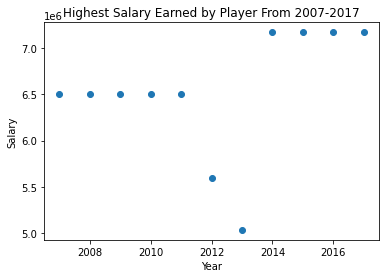

In [ ]:
x_max = ([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]) 
y_max = ([6500000.04, 6500000.04, 6500000.04, 6500000.04, 6500000.04, 5600000.0, 5038566.5, 
          7167500.0, 7167500.0, 7167500.0, 7167500.0 ])


plt.scatter(x_max, y_max)
plt.title('Highest Salary Earned by Player From 2007-2017')
plt.xlabel('Year')
plt.ylabel('Salary')

#Research Question #3

In [ ]:
#The plan here is to find out how team salaries changed over time. We are going
#to do this by makinf a scatter plot consisting of the sum of each individuak team
#per year. We are going to be displaying that changes over time in the same graph.
#The audience is going to be able to tell them apart by having each years data be 
#a different color. A legend will be added to help with the distinction.
player_salaries_07 = salaries_07.dropna() 
player_salaries_07.drop('base_salary', axis = 1, inplace = True)

#First, we will need to extract each team individually and calculate the total 
#sum of the 'guaranteed_compensation' column. We will do this by usng the 
#.isin function.
#2007 data:
ATL_07 = player_salaries_07[player_salaries_07['club'].isin(['ATL'])]
sum_ATL_07 = ATL_07['guaranteed_compensation'].sum()

CHI_07 = player_salaries_07[player_salaries_07['club'].isin(['CHI'])]  
sum_CHI_07 = CHI_07['guaranteed_compensation'].sum()

CHV_07 = player_salaries_07[player_salaries_07['club'].isin(['CHV'])] 
sum_CHV_07 = CHV_07['guaranteed_compensation'].sum()

CLB_07 = player_salaries_07[player_salaries_07['club'].isin(['CLB'])]  
sum_CLB_07 = CLB_07['guaranteed_compensation'].sum()

COL_07 = player_salaries_07[player_salaries_07['club'].isin(['COL'])]  
sum_COL_07 = COL_07['guaranteed_compensation'].sum()

DAL_07 = player_salaries_07[player_salaries_07['club'].isin(['DAL'])]  
sum_DAL_07 = DAL_07['guaranteed_compensation'].sum()

DC_07 = player_salaries_07[player_salaries_07['club'].isin(['DC'])] 
sum_DC_07 = DC_07['guaranteed_compensation'].sum()

HOU_07 = player_salaries_07[player_salaries_07['club'].isin(['HOU'])]  
sum_HOU_07 = HOU_07['guaranteed_compensation'].sum()

KC_07 = player_salaries_07[player_salaries_07['club'].isin(['KC'])]  
sum_KC_07 = KC_07['guaranteed_compensation'].sum()

LA_07 = player_salaries_07[player_salaries_07['club'].isin(['LA'])]  
sum_LA_07 = LA_07['guaranteed_compensation'].sum()

LAFC_07 = player_salaries_07[player_salaries_07['club'].isin(['LAFC'])] 
sum_LAFC_07 = LAFC_07['guaranteed_compensation'].sum()

MNUFC_07 = player_salaries_07[player_salaries_07['club'].isin(['MNUFC'])]
sum_MNUFC_07 = MNUFC_07['guaranteed_compensation'].sum()

MTL_07 = player_salaries_07[player_salaries_07['club'].isin(['MTL'])] 
sum_MTL_07 = MTL_07['guaranteed_compensation'].sum()

NE_07 = player_salaries_07[player_salaries_07['club'].isin(['NE'])]  
sum_NE_07 = NE_07['guaranteed_compensation'].sum()

NY_07 = player_salaries_07[player_salaries_07['club'].isin(['NY'])]
sum_NY_07 = NY_07['guaranteed_compensation'].sum()

NYCFC_07 = player_salaries_07[player_salaries_07['club'].isin(['NYCFC'])]
sum_NYCFC_07 = NYCFC_07['guaranteed_compensation'].sum()

NYRB_07 = player_salaries_07[player_salaries_07['club'].isin(['NYRB'])]  
sum_NYRB_07 = NYRB_07['guaranteed_compensation'].sum()

ORL_07 = player_salaries_07[player_salaries_07['club'].isin(['ORL'])]  
sum_ORL_07 = ORL_07['guaranteed_compensation'].sum()

PHI_07 = player_salaries_07[player_salaries_07['club'].isin(['PHI'])]  
sum_PHI_07 = PHI_07['guaranteed_compensation'].sum()

POR_07 = player_salaries_07[player_salaries_07['club'].isin(['POR'])]
sum_POR_07 = POR_07['guaranteed_compensation'].sum()

RSL_07 = player_salaries_07[player_salaries_07['club'].isin(['RSL'])]  
sum_RSL_07 = RSL_07['guaranteed_compensation'].sum()

SEA_07 = player_salaries_07[player_salaries_07['club'].isin(['SEA'])] 
sum_SEA_07 = SEA_07['guaranteed_compensation'].sum()

SJ_07 = player_salaries_07[player_salaries_07['club'].isin(['SJ'])]
sum_SJ_07 = SJ_07['guaranteed_compensation'].sum()

TFC_07 = player_salaries_07[player_salaries_07['club'].isin(['TFC'])]  
sum_TFC_07 = TFC_07['guaranteed_compensation'].sum()

TOR_07 = player_salaries_07[player_salaries_07['club'].isin(['TOR'])]  
sum_TOR_07 = TOR_07['guaranteed_compensation'].sum()

VAN_07 = player_salaries_07[player_salaries_07['club'].isin(['VAN'])] 
sum_VAN_07 = VAN_07['guaranteed_compensation'].sum()

#2008 data:
player_salaries_08 = salaries_08.dropna() 
player_salaries_08.drop('base_salary', axis = 1, inplace = True)

ATL_08 = player_salaries_08[player_salaries_08['club'].isin(['ATL'])]
sum_ATL_08 = ATL_08['guaranteed_compensation'].sum()

CHI_08 = player_salaries_08[player_salaries_08['club'].isin(['CHI'])]  
sum_CHI_08 = CHI_08['guaranteed_compensation'].sum()

CHV_08 = player_salaries_08[player_salaries_08['club'].isin(['CHV'])] 
sum_CHV_08 = CHV_08['guaranteed_compensation'].sum()

CLB_08 = player_salaries_08[player_salaries_08['club'].isin(['CLB'])]  
sum_CLB_08 = CLB_08['guaranteed_compensation'].sum()

COL_08 = player_salaries_08[player_salaries_08['club'].isin(['COL'])]  
sum_COL_08 = COL_08['guaranteed_compensation'].sum()

DAL_08 = player_salaries_08[player_salaries_08['club'].isin(['DAL'])]  
sum_DAL_08 = DAL_08['guaranteed_compensation'].sum()

DC_08 = player_salaries_08[player_salaries_08['club'].isin(['DC'])] 
sum_DC_08 = DC_08['guaranteed_compensation'].sum()

HOU_08 = player_salaries_08[player_salaries_08['club'].isin(['HOU'])]  
sum_HOU_08 = HOU_08['guaranteed_compensation'].sum()

KC_08 = player_salaries_08[player_salaries_08['club'].isin(['KC'])]  
sum_KC_08 = KC_08['guaranteed_compensation'].sum()

LA_08 = player_salaries_08[player_salaries_08['club'].isin(['LA'])]  
sum_LA_08 = LA_08['guaranteed_compensation'].sum()

LAFC_08 = player_salaries_08[player_salaries_08['club'].isin(['LAFC'])] 
sum_LAFC_08 = LAFC_08['guaranteed_compensation'].sum()

MNUFC_08 = player_salaries_08[player_salaries_08['club'].isin(['MNUFC'])]
sum_MNUFC_08 = MNUFC_08['guaranteed_compensation'].sum()

MTL_08 = player_salaries_08[player_salaries_08['club'].isin(['MTL'])] 
sum_MTL_08 = MTL_08['guaranteed_compensation'].sum()

NE_08 = player_salaries_08[player_salaries_08['club'].isin(['NE'])]  
sum_NE_08 = NE_08['guaranteed_compensation'].sum()

NY_08 = player_salaries_08[player_salaries_08['club'].isin(['NY'])]
sum_NY_08 = NY_08['guaranteed_compensation'].sum()

NYCFC_08 = player_salaries_08[player_salaries_08['club'].isin(['NYCFC'])]
sum_NYCFC_08 = NYCFC_08['guaranteed_compensation'].sum()

NYRB_08 = player_salaries_08[player_salaries_08['club'].isin(['NYRB'])]  
sum_NYRB_08 = NYRB_08['guaranteed_compensation'].sum()

ORL_08 = player_salaries_08[player_salaries_08['club'].isin(['ORL'])]  
sum_ORL_08 = ORL_08['guaranteed_compensation'].sum()

PHI_08 = player_salaries_08[player_salaries_08['club'].isin(['PHI'])]  
sum_PHI_08 = PHI_08['guaranteed_compensation'].sum()

POR_08 = player_salaries_08[player_salaries_08['club'].isin(['POR'])]
sum_POR_08 = POR_08['guaranteed_compensation'].sum()

RSL_08 = player_salaries_08[player_salaries_08['club'].isin(['RSL'])]  
sum_RSL_08 = RSL_08['guaranteed_compensation'].sum()

SEA_08 = player_salaries_08[player_salaries_08['club'].isin(['SEA'])] 
sum_SEA_08 = SEA_07['guaranteed_compensation'].sum()

SJ_08 = player_salaries_08[player_salaries_08['club'].isin(['SJ'])]
sum_SJ_08 = SJ_08['guaranteed_compensation'].sum()

TFC_08 = player_salaries_08[player_salaries_08['club'].isin(['TFC'])]  
sum_TFC_08 = TFC_08['guaranteed_compensation'].sum()

TOR_08 = player_salaries_08[player_salaries_08['club'].isin(['TOR'])]  
sum_TOR_08 = TOR_08['guaranteed_compensation'].sum()

VAN_08 = player_salaries_08[player_salaries_08['club'].isin(['VAN'])] 
sum_VAN_08 = VAN_08['guaranteed_compensation'].sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
sum_VAN_08

0.0

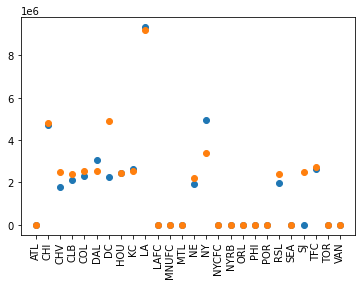

In [ ]:
#2007 Graph:
x_07_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_07_salaries = ([0, 4716304.5, 1789645.70, 2108226.06, 2281303.0, 3072764.75,
               2276390.0, 2434147.09, 2637550.0, 9322054.39, 0, 0, 0, 1945848.0,
               4928089.33, 0, 0, 0, 0, 0, 1974249.75, 0, 0, 2653987.5, 0, 0 ])

plt.scatter(x_07_club, y_07_salaries)
plt.xticks(rotation = 90);

#2008 Graph
x_08_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_08_salaries = ([0, 4808167.25, 2487846.19, 2372680.81, 2515949.54, 2553060.31,
               4881668.85, 2457094.46, 2551054.0, 9177665.6, 0, 0, 0, 2215295.5, 
               3367589.2, 0, 0, 0, 0, 0, 2418376.32, 0, 2503382.38, 2726478.8, 
               0, 0])

plt.scatter(x_08_club, y_08_salaries)
plt.xticks(rotation = 90);
























